In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/Users/seemarida/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
labcoord = np.load('PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_labcoord.npy')
regtrace = np.load('PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_regdeltaff.npy')

In [4]:
regtrace.shape

(8180, 4914)

In [5]:
labcoord.shape

(8180, 5)

In [6]:
regtrace[:5,:].shape

(5, 4914)

In [9]:
regtrace.shape

(8180, 4914)

In [10]:
# ICG algorithm

#step 1: compute correlation between all neurons or neuron clusters(np.corrcoef)

#step 2: greedily pair the neurons based on the correlation

#step 3: sum correlations of each pair

#step 4: repeat

In [11]:
#step 1: compute correlation between all neurons or neuron clusters(np.corrcoef)
corr_matrix = np.corrcoef(regtrace) # each row of `x` represents a variable, each column a single observation of all those variables
#corr_matrix = np.nan_to_num(corr_matrix, nan=-1)  # Replace NaNs with -1 to ignore them

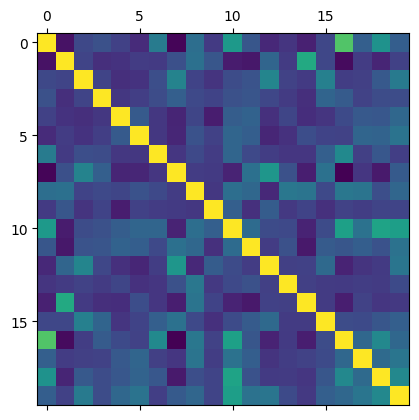

In [12]:
plt.matshow(np.corrcoef(regtrace[:20,:]))
plt.show()

In [13]:
corr_matrix.shape[0]

8180

## step 2: greedily pair the neurons based on the correlation

In [14]:
# look for the hgihest correlation of neuron 1 with other neurons
# pair them
#n1_corrs = corr_matrix[0]  # Get the first row (Neuron 1)
#n1_corrs[0] = -1  # Ignore self-correlation
#n1_corrs[np.argmax(n1_corrs)] # corr value

In [15]:
# look for the hgihest correlation of neuron 2 with other neurons
# pair them
#n2_corrs = corr_matrix[1]  # Get the first row (Neuron 1)
#n2_corrs[1] = -1  # Ignore self-correlation
#n2_corrs[np.argmax(n2_corrs)] # corr value

In [16]:
#step 2: greedily pair the neurons based on the correlation
pairs = {}
used_neurons = set()
for neuron in range(corr_matrix.shape[0]):

    if neuron in used_neurons: # skip paired
        continue

    neuron_corrs = corr_matrix[neuron] #corr value of neuron
    neuron_corrs[neuron] = -1 # (n1,n1)
    
    neuron_corrs[list(used_neurons)] = -1 # used set to -1

    highest_corr_n = np.argmax(neuron_corrs)  #highest corr
    # 
    
    pairs[neuron] = {
        "pair": highest_corr_n,
        "correlation": corr_matrix[neuron, highest_corr_n]
    }
    used_neurons.add(neuron)
    used_neurons.add(highest_corr_n)

## step 3: merge paired neurons (sum activity)

In [17]:
regtrace.shape

(8180, 4914)

In [18]:
#step 3: merge paired neurons by summing activity
groups = []
for n1, corr in pairs.items():
    n2 = corr["pair"]
    summed_activity = regtrace[n1] + regtrace[n2]
    groups.append(summed_activity)

In [19]:
regtrace.shape[0] # before

8180

In [20]:
groups = np.array(groups)
groups.shape[0] # after

4090

## step 4: iterate

In [7]:
regtrace

array([[ 2.40508199,  4.4212575 , 15.82823086, ...,  5.69396591,
         4.52273703,  0.        ],
       [ 1.7090261 ,  1.11716795,  0.14727081, ...,  6.13473034,
         0.67381257,  1.14160955],
       [ 6.71820164,  8.25979233,  0.65541083, ...,  2.89435792,
         1.8674984 ,  2.48839355],
       ...,
       [ 0.12154441,  0.10821331,  0.25683999, ...,  0.28416896,
         0.1135048 ,  0.22655256],
       [ 0.39308801,  0.04232984,  2.02588463, ...,  0.39179745,
         0.50238031,  0.40740642],
       [ 0.1447245 ,  0.27280253,  3.21057653, ...,  0.47937089,
         0.21570553,  1.11822975]])

In [21]:
regtrace.shape

(2045, 4914)

In [46]:
#step 1: compute correlation between all neurons or neuron clusters(np.corrcoef)
corr_matrix = np.corrcoef(regtrace) # each row of `x` represents a variable, each column a single observation of all those variables

#step 2: greedily pair the neurons based on the correlation
pairs = {}
used_neurons = set()
#Loop across all neurons 
#========================
for neuron in range(corr_matrix.shape[0]):
    if neuron in used_neurons: # skip paired
        continue
    neuron_corrs = corr_matrix[neuron] #corr value of neuron
    neuron_corrs[neuron] = -1 # (n1,n1)
    neuron_corrs[list(used_neurons)] = -1 # used set to -1
    highest_corr_n = np.argmax(neuron_corrs)  #highest corr

    #CHANGE THIS LATER -> IF ALL RUNS SLOW; CHANGE THIS!
    if len(np.unique(neuron_corrs)) == 1:
        
    
    pairs[neuron] = {
        "pair": highest_corr_n,
        "correlation": corr_matrix[neuron, highest_corr_n]
    }
    used_neurons.add(neuron)


2044


In [48]:
np.unique(neuron_corrs)

array([-1.])

In [44]:
len(np.unique(neuron_corrs)) == 1

True

In [39]:
-1*(neuron-1)

1

In [32]:
pairs.items()

dict_items([(0, {'pair': 117, 'correlation': 0.7096809070808524}), (1, {'pair': 24, 'correlation': 0.7914158301893126}), (2, {'pair': 13, 'correlation': 0.5874204854516863}), (3, {'pair': 51, 'correlation': 0.7925169503883487}), (4, {'pair': 76, 'correlation': 0.5907968636440405}), (5, {'pair': 19, 'correlation': 0.6547695422999291}), (6, {'pair': 140, 'correlation': 0.4305780652395601}), (7, {'pair': 97, 'correlation': 0.8043966840916965}), (8, {'pair': 69, 'correlation': 0.7010315796062027}), (9, {'pair': 844, 'correlation': 0.2046313353456381}), (10, {'pair': 71, 'correlation': 0.647054563259914}), (11, {'pair': 26, 'correlation': 0.5836501369169278}), (12, {'pair': 172, 'correlation': 0.7961503577850886}), (13, {'pair': 58, 'correlation': 0.5812922401299879}), (14, {'pair': 16, 'correlation': 0.6568344128943382}), (15, {'pair': 116, 'correlation': 0.6139035456887926}), (16, {'pair': 136, 'correlation': 0.7099918609018687}), (17, {'pair': 313, 'correlation': 0.6094792921429404}), (1

In [20]:
## iterative course-graining function

count = 0
leftover = [] # neurons leftover 
cond=True

#Loop while cond is True
#=======================
while cond==True:
    print(regtrace.shape[0])
    leftover.append(regtrace.shape[0])
    if np.mod(regtrace.shape[0],2) ==1:
        break
    
        used_neurons.add(highest_corr_n)

    #step 3: merge paired neurons by summing activity
    groups = []
    #Loop through all pairs
    #=====================
    for n1, corr in pairs.items():
        n2 = corr["pair"]
        summed_activity = regtrace[n1] + regtrace[n2]
        groups.append(summed_activity)

    # make new array
    regtrace_new = np.array(groups)

    # stop when neurons left aren't enough to be paired
    #convert cond bool to False 
    if regtrace_new.shape[0] <= 1: 
        cond = False
        
    regtrace = regtrace_new
    count += 1





8180
4090
2045


In [10]:
## iterative course-graining function

def icg(regtrace):
    count = 0
    leftover = [] # neurons leftover 
    cond=True

    #Loop while cond is True
    #=======================
    while cond==True:
        print(regtrace.shape[0])
        leftover.append(regtrace.shape[0])
        
        #step 1: compute correlation between all neurons or neuron clusters(np.corrcoef)
        corr_matrix = np.corrcoef(regtrace) # each row of `x` represents a variable, each column a single observation of all those variables
        
        #step 2: greedily pair the neurons based on the correlation
        pairs = {}
        used_neurons = set()
        #Loop across all neurons 
        #========================
        for neuron in range(corr_matrix.shape[0]):
            if neuron in used_neurons: # skip paired
                continue
            neuron_corrs = corr_matrix[neuron] #corr value of neuron
            neuron_corrs[neuron] = -1 # (n1,n1)
            neuron_corrs[list(used_neurons)] = -1 # used set to -1
            highest_corr_n = np.argmax(neuron_corrs)  #highest corr
            
            pairs[neuron] = {
                "pair": highest_corr_n,
                "correlation": corr_matrix[neuron, highest_corr_n]
            }
            used_neurons.add(neuron)
            used_neurons.add(highest_corr_n)

        #step 3: merge paired neurons by summing activity
        groups = []
        #Loop through all pairs
        #=====================
        for n1, corr in pairs.items():
            n2 = corr["pair"]
            summed_activity = regtrace[n1] + regtrace[n2]
            groups.append(summed_activity)

        # make new array
        regtrace_new = np.array(groups)

        # stop when neurons left aren't enough to be paired
        #convert cond bool to False 
        if regtrace_new.shape[0] <= 1: 
            cond = False
            
        regtrace = regtrace_new
        count += 1

    final_iteration = count+1
    unpaired_leftover = regtrace.shape[0]
    print('Iterations needed:', final_iteration)
    print('Neurons leftover:', unpaired_leftover)
    
    return final_iteration, unpaired_leftover, regtrace

In [ ]:
#figure out how to deal with odd cases

In [11]:
final_iteration, unpaired_leftover, final_activity_matrix = icg(regtrace)

8180
4090
2045
1023
512
256
128
64
32
16
8
4
2
Iterations needed: 14
Neurons leftover: 1


In [50]:
final_iteration, unpaired_leftover, final_activity_matrix

(13,
 2,
 array([[16699.97780348, 18404.08630127, 19484.30879964, ...,
          8387.00656301,  8395.38258826,  8210.13907849],
        [ 9402.83509575,  9754.91726334,  9984.65978755, ...,
         15924.63301213, 15569.43508555, 15597.46439749]]))